# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

**Anggota Kelompok :**

**1. Daffa Yudisa Akbar /			NIM. 2241720008**

**2. Hafizh Muhammad Rabbani /	NIM. 2241720242**

**3. Joyo Sugito /				NIM. 2241720050**

**4. Rendy Putra Kusuma /		NIM. 2241720124**

# 3. Gunakan model CNN untuk face recognition


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [3]:
train_dir = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Train"
test_dir = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Test"

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 369 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


In [4]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # Output sesuai jumlah kelas
    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,402,308 (20.61 MB)

 Trainable params: 5,402,308 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
epochs = 10

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 185s 9s/step - accuracy: 0.3920 - loss: 1.4559 - val_accuracy: 0.8478 - val_loss: 0.6073
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 906ms/step - accuracy: 0.8532 - loss: 0.4994 - val_accuracy: 0.8913 - val_loss: 0.2400
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 909ms/step - accuracy: 0.9369 - loss: 0.1754 - val_accuracy: 0.8913 - val_loss: 0.2959
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 767ms/step - accuracy: 0.9890 - loss: 0.1122 - val_accuracy: 0.9891 - val_loss: 0.0468
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 935ms/step - accuracy: 0.9912 - loss: 0.0331 - val_accuracy: 0.9457 - val_loss: 0.1979
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 900ms/step - accuracy: 0.9710 - loss: 0.0622 - val_accuracy: 0.9565 - val_loss: 0.1616
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 881ms/step - accuracy: 0.9870 - loss: 0.0536 - val_accuracy: 0.9891 - val_loss: 0.0413
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 857ms/step - accuracy: 0.9991 - loss: 0.0107 - val_accuracy: 0.9783 

In [6]:
model.save('face_recognition_cnn_model.h5')

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


recognition_model = load_model('/content/face_recognition_cnn_model.h5')
class_labels = list(train_generator.class_indices.keys())


def detect_and_recognize(frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))  

        for (x, y, w, h) in faces:
            
            face_roi = frame[y:y+h, x:x+w]

            
            face_resized = cv2.resize(face_roi, (160, 160))  
            face_resized = np.expand_dims(face_resized, axis=0) / 255.0  

            
            prediction = recognition_model.predict(face_resized)
            label_index = np.argmax(prediction)  
            label = class_labels[label_index]   

            
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        return frame

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


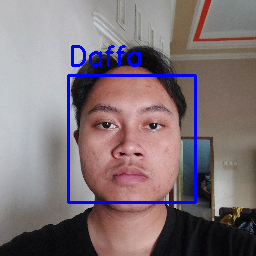

In [ ]:
from google.colab.patches import cv2_imshow  
import cv2
import numpy as np


image_path = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Train/Daffa/20241201_100321.jpg"


image_read = cv2.imread(image_path)
image = cv2.resize(image_read, (256, 256))  


if image is None:
    print("Gambar tidak ditemukan di path:", image_path)
else:
    processed_image = detect_and_recognize(image)

    
    cv2_imshow(processed_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


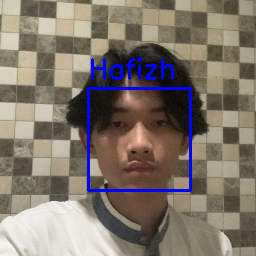

In [ ]:

image_path = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Train/Hafizh/WhatsApp Image 2024-12-03 at 11.45.46_4b363a27.jpg"


image_read = cv2.imread(image_path)
image = cv2.resize(image_read, (256, 256))  


if image is None:
    print("Gambar tidak ditemukan di path:", image_path)
else:
    processed_image = detect_and_recognize(image)

    
    cv2_imshow(processed_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


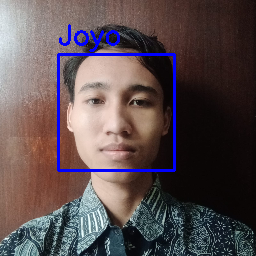

In [ ]:

image_path = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Train/Joyo/(67).jpg"


image_read = cv2.imread(image_path)
image = cv2.resize(image_read, (256, 256))  


if image is None:
    print("Gambar tidak ditemukan di path:", image_path)
else:
    processed_image = detect_and_recognize(image)

    
    cv2_imshow(processed_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


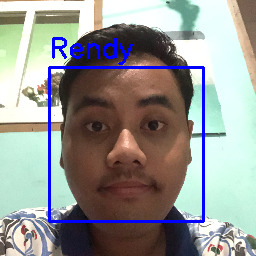

In [ ]:

image_path = "/content/drive/MyDrive/Machine_Learning/dataset_kelompok6/Train/Rendy/Rendy (37).jpg"


image_read = cv2.imread(image_path)
image = cv2.resize(image_read, (256, 256))  


if image is None:
    print("Gambar tidak ditemukan di path:", image_path)
else:
    processed_image = detect_and_recognize(image)

    
    cv2_imshow(processed_image)
